### **Ice Marketing Campaign Strategy 2017**

#### **1. Introduction**
- The objective of this product is to develop an advertising strategy for projected winners in the video game sector.
- Historical video game sales data will be analyzed to inform the forecast and identify potential big winners that should garner advertising support proportional to their sales.
- The dataset is the aggregation of several open sources providing insights on user and expert reviews, platforms, and historical sales data.

#### **2. Approach**
The dataset will be analyzed to understand the following:
- Sales Performance Across Different Platforms at Different Points in Time
- Impact of User and Professional Reviews on Sales
- Profitability Across Different Genres
- Regional User Profiles

The project will consist of the following stages:
1. Data Preparation
2. Data Analysis
3. Regional User Profile Definition
4. Hypothesis Testing
5. Conclusion

#### **3. Initialization**
Importing all relevant libraries and loading in the dataset.

In [256]:
import pandas as pd
import numpy as np
import math as mt
import random as rd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from scipy import stats as st

In [257]:
#Load the data

url = "https://raw.githubusercontent.com/Flamingo-Rocker/Video-Game-Marketing-Strategy/refs/heads/main/games.csv"
games = pd.read_csv(url)

#Display first few rows the check that the pull worked
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### **4. Data Preparation**
- Replace column names
- Convert data to required types
- Address missing and/or duplicate values as-necessary
- Enrich the data with additional columns useful for analysis

In [258]:
#Print the general/summary information about the dataset
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [259]:
#Rename the columns to appropriate style
games = games.rename(
    columns={
        'Name': 'name',
        'Platform': 'platform',
        'Year_of_Release': 'year_of_release',
        'Genre': 'genre',
        'NA_sales': 'na_sales',
        'EU_sales': 'eu_sales',
        'JP_sales': 'jp_sales',
        'Other_sales': 'other_sales',
        'Critic_Score': 'critic_score',
        'User_Score': 'user_score',
        'Rating': 'rating'
    }
)
#print(games.columns)

In [260]:
#Verify the number of duplicated rows and remove if necessary
games.duplicated().sum()

0

There are no duplicate rows - missing values shall now be assessed.

In [261]:
#Review number of missing values
print(games.isna().sum())
#print()

#Drop rows where name or year_of_release are missing
games.dropna(subset=['name', 'year_of_release'], inplace=True)

#Replace missing critic scores with the median critic score
games['critic_score'] = games['critic_score'].fillna(games['critic_score'].median())

#Replace 'tbd' values with NaN in user_score
games['user_score'] = games['user_score'].replace({'tbd': np.nan})

#Convert user_score to float and replace missing values with median score
games['user_score'] = games['user_score'].astype('float64')
games['user_score'] = games['user_score'].fillna(games['user_score'].median())

#Replace missing values in rating column with "No Rating"
games['rating'] = games['rating'].fillna('No Rating')

#Change year_of_release to an integer for cleaner optics
games['year_of_release'] = games['year_of_release'].astype('int64')

#Verify missing values resolved
#print(games.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


Several steps were taken above to address issues with datatypes and missing values:
- A small number of missing values were detected in the **`name`** and  **`year_of_release`** columns
    - The affected rows were dropped as they would not significantly impact the available data
- There was a significant amount of missing values in the following columns:
    - **`critic_score`**: 
        - Nearly half of the rows were missing data in this column
        - The median critic score was used to fill in missing values to prevent data quality loss
    - **`user_score`**:
        - This column was an **object** datatype and needed to be converted to **float**, but the presence of the 'tbd' string in the column needed to be addressed first
        - To facilitate the conversion, the 'tbd's were replaced with **nan** values
        - The column was then converted to a **float** datatype, and missing values were then replaced with the median user score to prevent data quality loss
    - **`rating`**:
        - Missing values in this column were replaced with the string 'No Rating to prevent data quality loss
    - **`year_of_release`**:
        - Converted to an **int** datatype as years are discrete values adn the decimal is unnecessary

In [262]:
#Create total sales column
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

Added **`total_sales**` column to aggregate sales in all regions for each row

#### **4. Data Analysis**

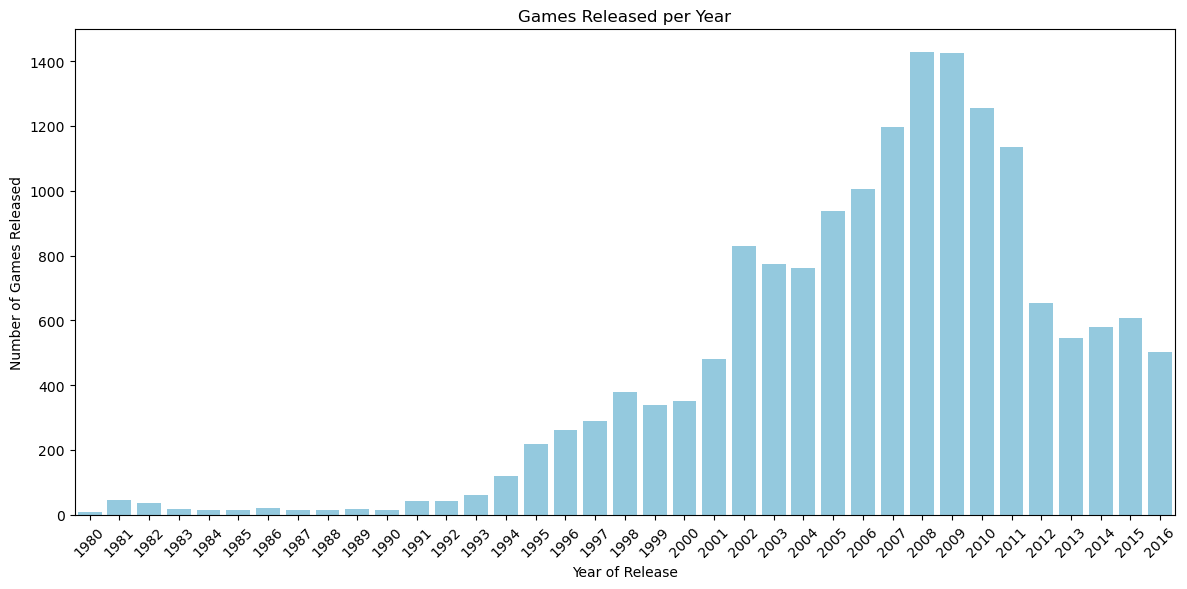

In [263]:
# Group the number games released by year
games_per_year = games.groupby('year_of_release')['name'].count().reset_index()
games_per_year.columns = ['year_of_release', 'games_released']
plt.figure(figsize=(12, 6))
sns.barplot(data=games_per_year, x='year_of_release', y='games_released', color='skyblue')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games Released')
plt.title('Games Released per Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- From the bar chart above, the years where most games were released were in the late 2000s (approximately 2007 - 2010). 
- In the following code blocks, the most impactful platforms shall be analyzed to determine pertinent lifecycle information. 
- Though the most games were manufactured in this window, the most relevant data for our analysis would likely be in the last 5 years, as game development has appeared to slow as consoles became more advanced and more development time was required to put put out product. 
- For the sake of our analysis, we will proceed with data from the previous 5 years, from 2012 to 2016 and exclude the data prior to this period after we obtain lifecycle insights.

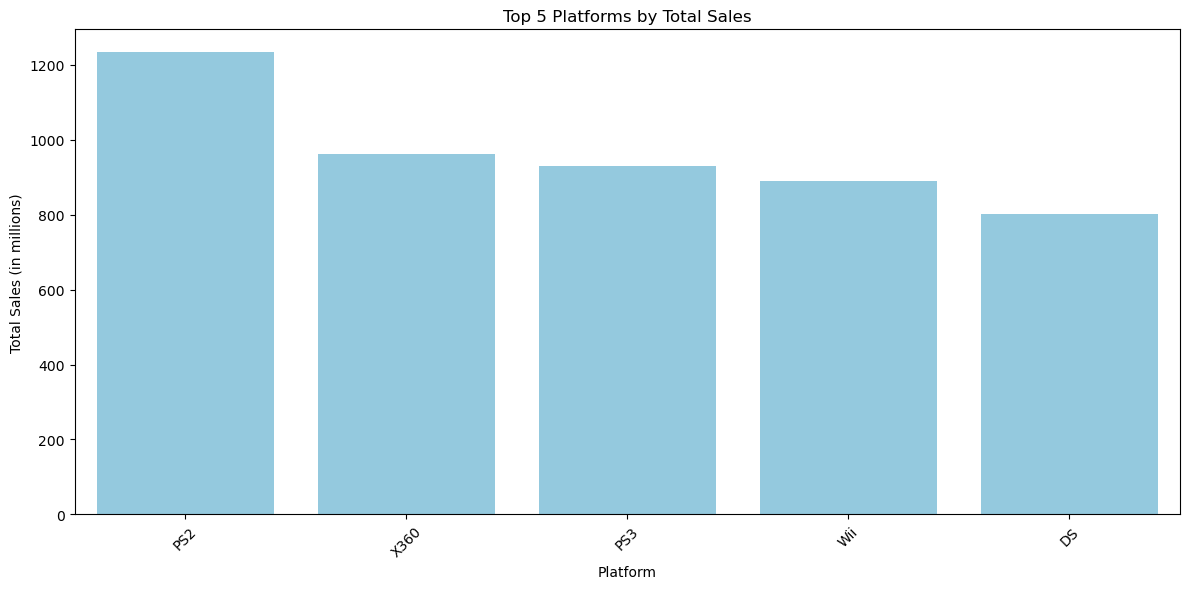

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78


In [264]:
# Look at how sales varied from platform to platform. 
# Choose the platforms with the greatest total sales and build a distribution based on data for each year. 
# Find platforms that used to be popular but now have zero sales. 
# How long does it generally take for new platforms to appear and old ones to fade?

# Group the data by platform and year, summing the total sales
platform_sales = games.groupby(['platform'])['total_sales'].sum().reset_index()
platform_sales = platform_sales.sort_values(by='total_sales', ascending=False)
top_5_platforms = platform_sales.head(5)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_5_platforms, x='platform', y='total_sales', color='skyblue')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.title('Top 5 Platforms by Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_5_platforms

In [265]:
# Choose the platforms with the greatest total sales and build a distribution based on data for each year. 
# Find platforms that used to be popular but now have zero sales. 
# How long does it generally take for new platforms to appear and old ones to fade?

t5platform_sales_per_year = games[
    (games['platform'].isin(top_5_platforms['platform'])) &
    (games['year_of_release'] >= 2000)
    ].groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

sales_dist = px.line(
    t5platform_sales_per_year, 
    x='year_of_release', 
    y='total_sales', 
    title='Total Sales by Top 5 Platforms Over the Years',
    color='platform',
    markers=True
)

sales_dist.update_layout(
    xaxis_title='Year of Release',
    yaxis_title='Total Sales (in millions)',
    legend_title_text='Platform'
)
sales_dist.show()

- The top 5 platforms by total sales were analyzed in the chart above, showing their sales over time.
- The visualization suggests that the average life cycle of a platform spans approximately 10 years.
- The analysis above shall be repeated for the top 20 platforms by totals to confirm this implication and obtain more data to inform how long it takes for new platforms to appear.

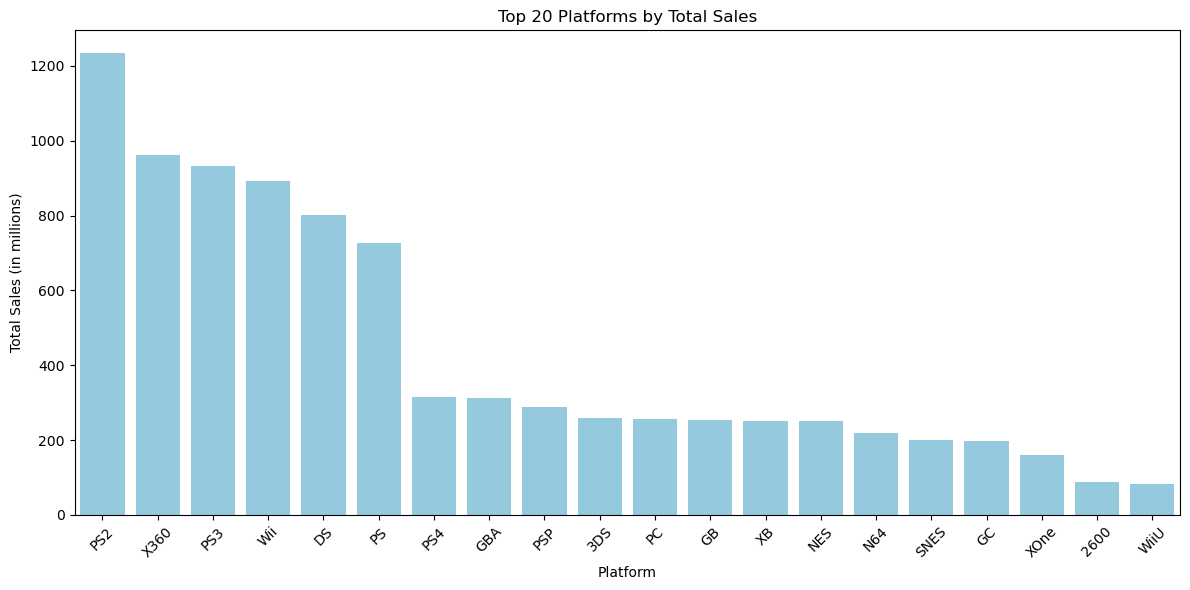

In [266]:
platform_sales = games.groupby(['platform'])['total_sales'].sum().reset_index()
platform_sales = platform_sales.sort_values(by='total_sales', ascending=False)
top_20_platforms = platform_sales.head(20)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_20_platforms, x='platform', y='total_sales', color='skyblue')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.title('Top 20 Platforms by Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_20_platforms


t20platform_sales_per_year = games[
    (games['platform'].isin(top_20_platforms['platform'])) &
    (games['year_of_release'] >= 1990)
    ].groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

sales_dist = px.line(
    t20platform_sales_per_year, 
    x='year_of_release', 
    y='total_sales', 
    title='Total Sales by Top 20 Platforms Over the Years',
    color='platform',
    markers=True
)

sales_dist.update_layout(
    xaxis_title='Year of Release',
    yaxis_title='Total Sales (in millions)',
    legend_title_text='Platform'
)
sales_dist.show()

- The Top 20 Platforms by Total Sales were analyzed in the visualizations above.
- The observation noted above regarding the average life cycle of a platform spanning approximately 10 years is supported with the additional platform data.
- The visualization above shows that new platforms appear appoximately every 5 years.
    - This can be seen in several examples from releases by the same company, such as:
        - Sony releasing the PS1 in 1994, followed by the PS2 in 2000,
        - Nintendo releasing the N64 in 1996, followed by the GameCube in 2001, and
        - Microsoft released the Xbox in 2000, followed by the Xbox360 in 2005.
- We will now proceed with analyzing these trends in the current market environment, best reflected in the datapoints from 2012 through the end of 2016.

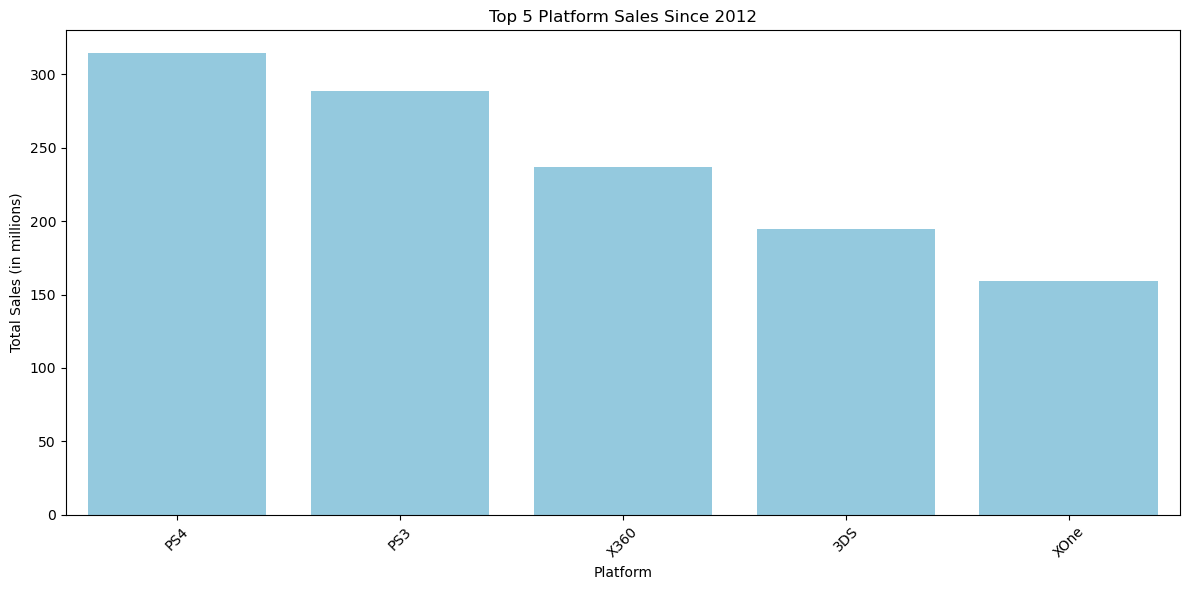

In [267]:
post_2012 = games[games['year_of_release'] >= 2012]
platform_sales = post_2012.groupby(['platform'])['total_sales'].sum().reset_index()
platform_sales = platform_sales.sort_values(by='total_sales', ascending=False)
top_5_platforms = platform_sales.head(5)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_5_platforms, x='platform', y='total_sales', color='skyblue')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.title('Top 5 Platform Sales Since 2012')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_5_platforms

t5platform_sales_per_year = games[
    (games['platform'].isin(top_5_platforms['platform'])) &
    (games['year_of_release'] >= 2012)
    ].groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

sales_dist = px.line(
    t5platform_sales_per_year, 
    x='year_of_release', 
    y='total_sales', 
    title='Total Sales by Top 5 Platforms Since 2012',
    color='platform',
    markers=True
)

sales_dist.update_layout(
    xaxis_title='Year of Release',
    yaxis_title='Total Sales (in millions)',
    legend_title_text='Platform',
    xaxis=dict(
        tickmode='linear',
        dtick=1
    )
)
sales_dist.show()

- The visualizations above show that the most profitable platforms in recent years are the 3DS, the PS3, the XBox 360, the PS4, and the XBox One.
- Though the 3DS, PS3 and XBox 360 are among sales leaders, they are clearly on the decline, and are at the end of their lifecyce.
    - It does not make business sense to pursue a marketing strategy with these platforms in mind.
- The PS4 and XBox One platforms are early in their product lifecycle and though it appears as though 2016 was a down year for both systems, the dataset was accepted with the understanding that data from 2016 may be missing. 
    - Both systems are clearly trending upwards in total sales since their inception in 2013, and the marketing strategy should therefore be centered around advertising with these two platforms in mind.

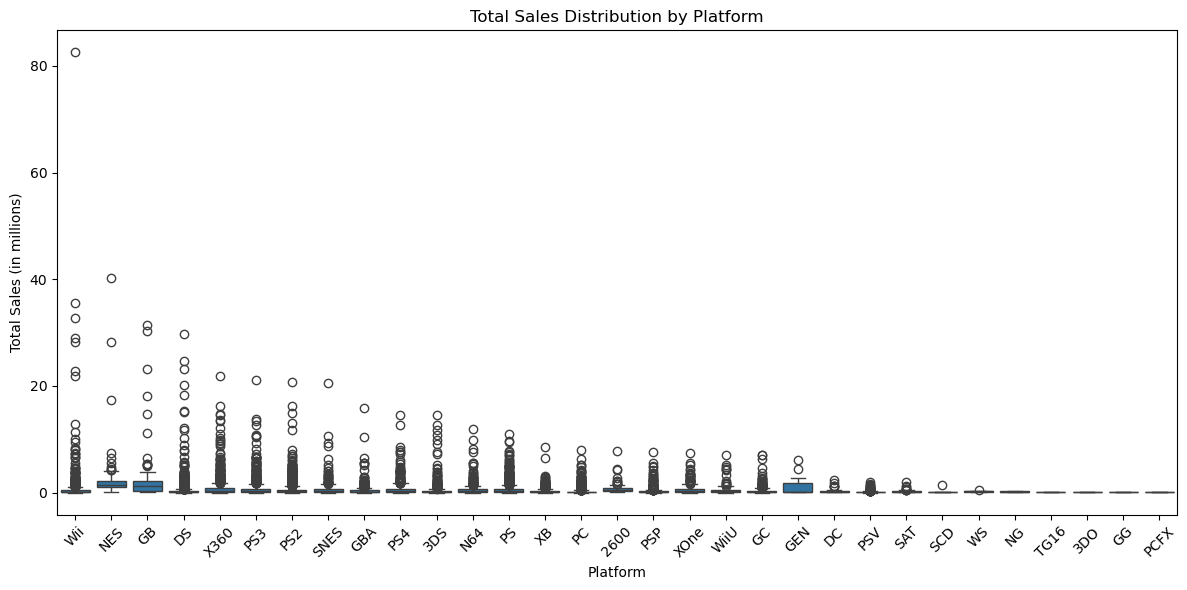

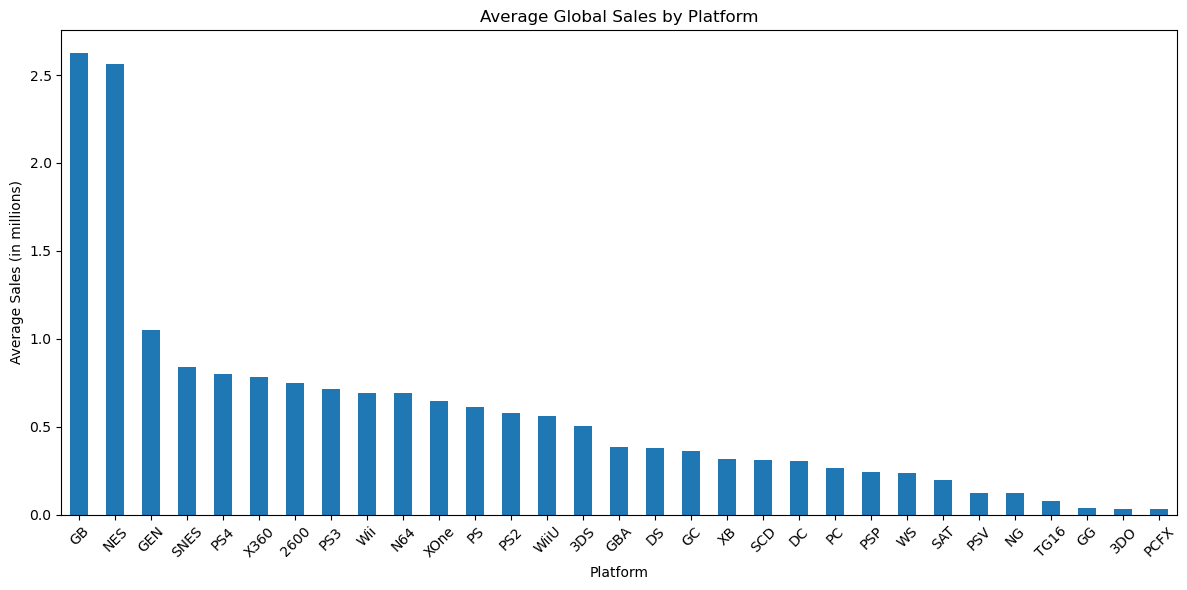

In [268]:
# Build a box plot for the global sales of all games, broken down by platform. 
# Are the differences in sales significant? 
# What about average sales on various platforms? Describe your findings.

plt.figure(figsize=(12, 6))
sns.boxplot(data=games, x='platform', y='total_sales')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.title('Total Sales Distribution by Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

avg_sales = games.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
avg_sales.plot(kind='bar', figsize=(12, 6), title='Average Global Sales by Platform')
plt.ylabel('Average Sales (in millions)')
plt.xlabel('Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The boxplot above shows that the differences in sales between the different platforms do not appear to be exceptionally different when considering the interquartile ranges.
- There are a very large number of outliers present that that significantly impact the average global sales, but may not be indicative of the actual situation in terms of sales strategy.
    - In reference to the GameBoy and NES average global sales on the bar chart above, for example, it appears as though those two were the most commercially successful platforms ever released. 
    - In actuality, though these two systems were successful in their own right, they had a number of hugely popular games that sold well that artifically drove up the average, though most of the sales sold on those two platforms were not significantly different than the other platforms over time.
    - For the GameBoy and NES specifically, Nintendo was singlehandledy responsible for the mainstream popularity for handheld and home video game system when these systems were introduced to the market, paving the way for the competition to enter in years that followed. 
    - The commercial successes of some of the games that were released on these platforms can be lent to the fact that Nintendo dominated the market in the early years of video game development and sales, and the novelty of these new products benefitted the velocity of sales. 

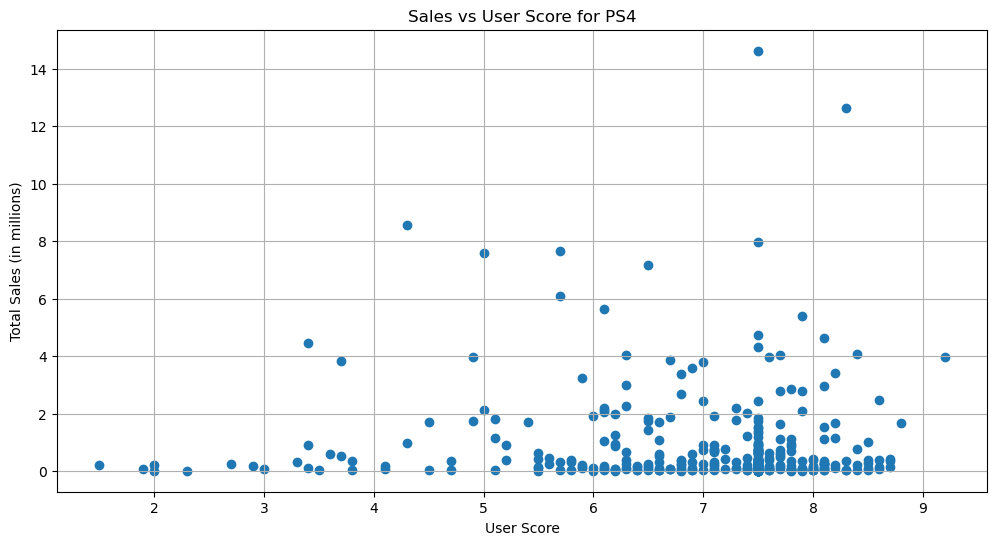

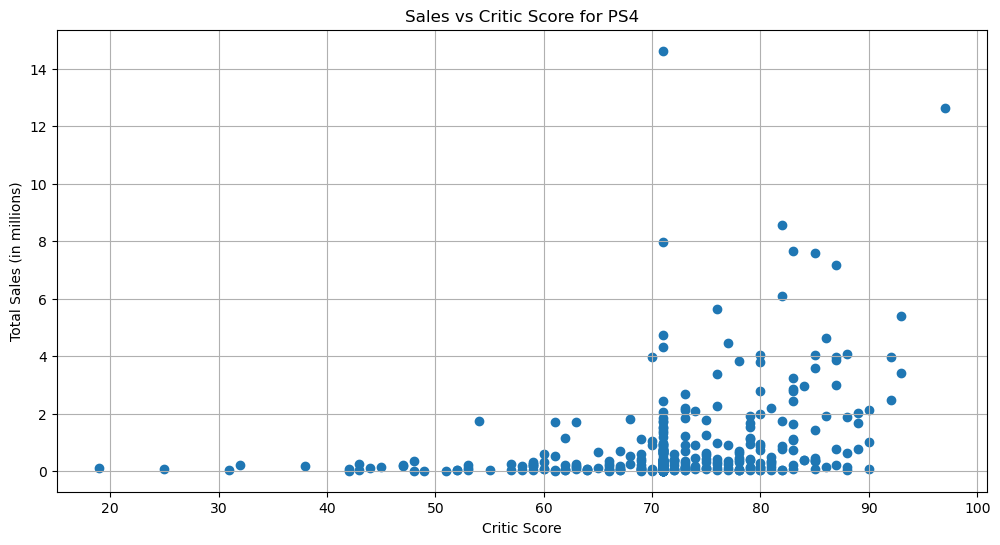

Correlation between User Score and Total Sales for PS4: -0.06
Correlation between Critic Score and Total Sales for PS4: 0.34


In [269]:
# Take a look at how user and professional reviews affect sales for one popular platform (you choose). 
# Build a scatter plot and calculate the correlation between reviews and sales. 
# Draw conclusions.

platform = 'PS4'
platform_data = games[games['platform'] == platform]

# Scatter plot for user score vs total sales
plt.figure(figsize=(12, 6))
plt.scatter(platform_data['user_score'], platform_data['total_sales'])
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')    
plt.title(f'Sales vs User Score for {platform}')
plt.grid() 
plt.show()

# Scatter plot for critic score vs total sales
plt.figure(figsize=(12, 6))
plt.scatter(platform_data['critic_score'], platform_data['total_sales'])
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')    
plt.title(f'Sales vs Critic Score for {platform}')
plt.grid() 
plt.show()

# Calculate correlation coefficients
user_score_corr = platform_data['user_score'].corr(platform_data['total_sales'])
critic_score_corr = platform_data['critic_score'].corr(platform_data['total_sales'])
print(f"Correlation between User Score and Total Sales for {platform}: {user_score_corr:.2f}")
print(f"Correlation between Critic Score and Total Sales for {platform}: {critic_score_corr:.2f}")

**User Score**
- The correlation between User Score and Total Sales for the PS4 was -0.06, which indicates that there is no apparent relationship between the two variables.
- This suggests that user reviews may not impact games purchases and the power of the brand or marketing may be more impactful than user reviews when it comes to consumer behavior.

**Critic Score**
- The correlation between Critic Score and Total Sales for the PS4 was 0.34, which indicates that there is a very weak positive relationship between critic scores and total sales.
- The higher the critic score, the higher the total sales tends to be, on a very weak level.
- This may suggest that pre-release critic reviews may have some influence over consumer purchasing behavior and/or the manufacturer's advertising/marketing posture to address the reviews.

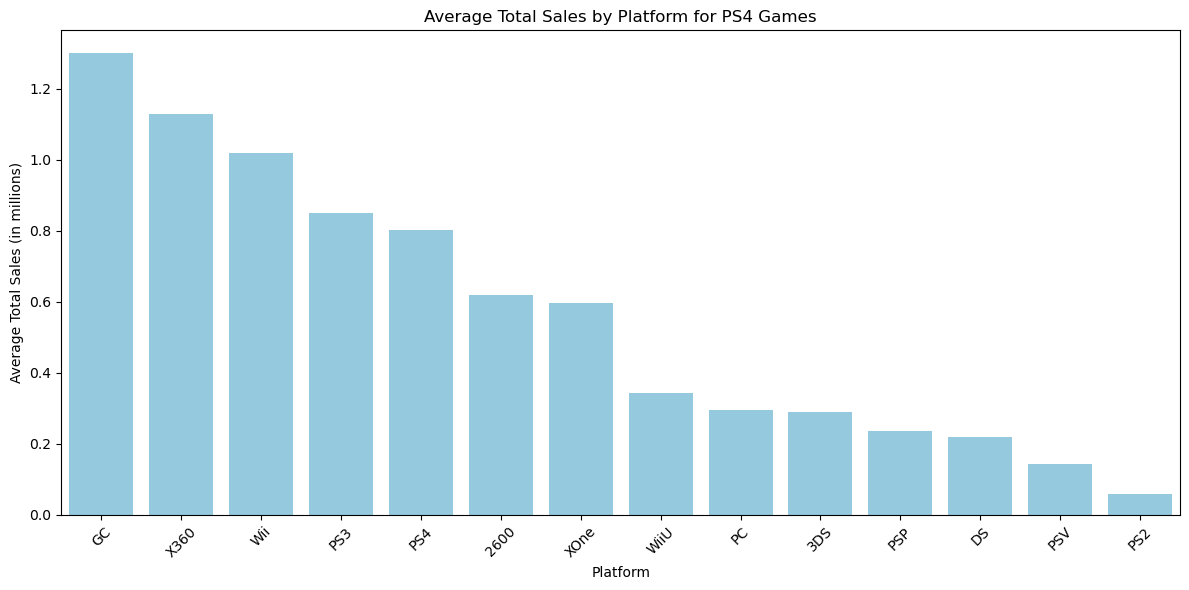

In [270]:
# Keeping your conclusions in mind, compare the sales of the same games on other platforms.

ps4_games = games[games['platform'] == 'PS4']['name'].unique()
cross_platform_games = games[games['name'].isin(ps4_games)]
xplatform_sales_comparison = cross_platform_games.groupby('platform')['total_sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=xplatform_sales_comparison.reset_index(), x='platform', y='total_sales', color='skyblue')
plt.xlabel('Platform')
plt.ylabel('Average Total Sales (in millions)')
plt.title('Average Total Sales by Platform for PS4 Games')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- For games that are not exclusive to the PS4 platform, ther GameCube, XBox360, Wii, and PS3 averaged higher total sales than the PS4.
- It is worth noting that all four of those systems are at the end of their lifecycle, whereas the PS4 is at the very beginning of its own.
    - This suggests that the games that the PS4 offers in common with the leaders are re-releases from prior titles, rather than being parallel new releases.
    - When this fact is considered, the PS4's nearest peer on this list would be the XBox One, another system that is in the beginning of its lifecycle.

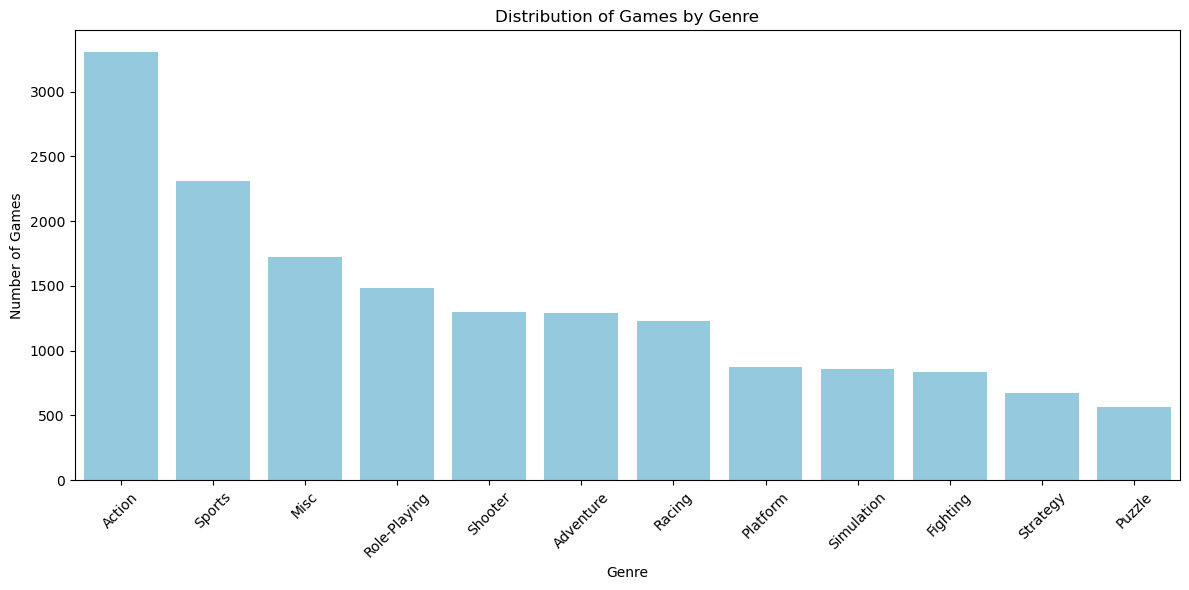

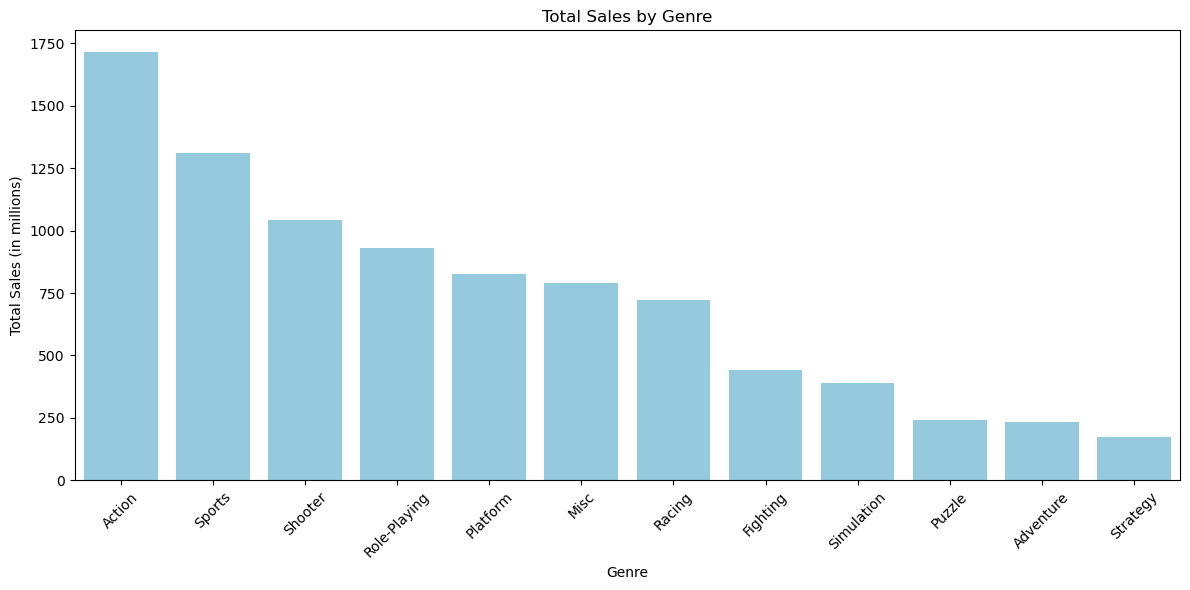

In [271]:
# Take a look at the general distribution of games by genre. 
# What can we say about the most profitable genres? 
# Can you generalize about genres with high and low sales?

plt.figure(figsize=(12, 6))
sns.countplot(data=games, x='genre', order=games['genre'].value_counts().index, color='skyblue', legend=False)
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.title('Distribution of Games by Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate total sales by genre
genre_sales = games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_sales.reset_index(), x='genre', y='total_sales', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.title('Total Sales by Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- The sales distribution visualization above shows that the best selling games fall under the Action, Sports, and Shooter categories.
- These genres are also in the top 5 genres in terms of number of games published.
- These genres have common appeal with a large fanbase, and require very little context or preparation to get involved with.
    -  Examples of this point include games such as the 2K Sports titles and the Call of Duty title, that anybody can just pick up and get going with, and has international acclaim.
- Among the lowest selling genres are Puzzle, Adventure, and Strategy games.
    - These games may be more niche and have a specific, dedicated fanbase that they cater to.
    - It is also likely that the budgets for advertising and the overall mass appeal/hype of these games are much smaller relative to their peers in the top-selling categories.

#### **5. Regional User Profile Definition**
- Create user profiles for the NA, EU, and JP regions
    - Top 5 Platforms
    - Top 5 Genres
    - Impact of Ratings

##### **5.1 NA User Profile**

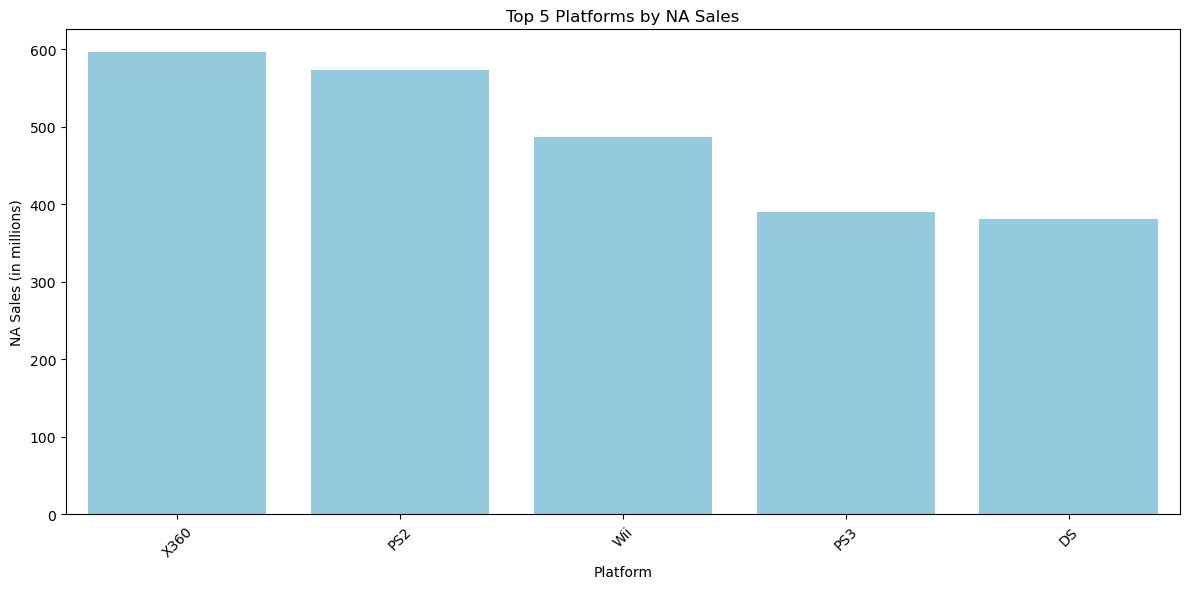

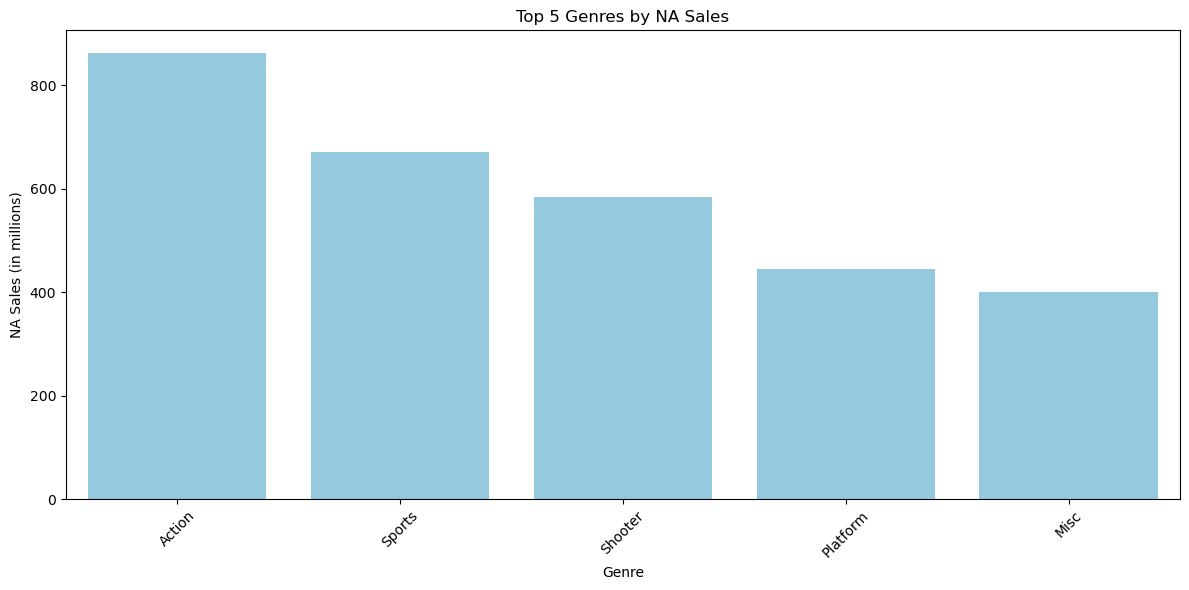

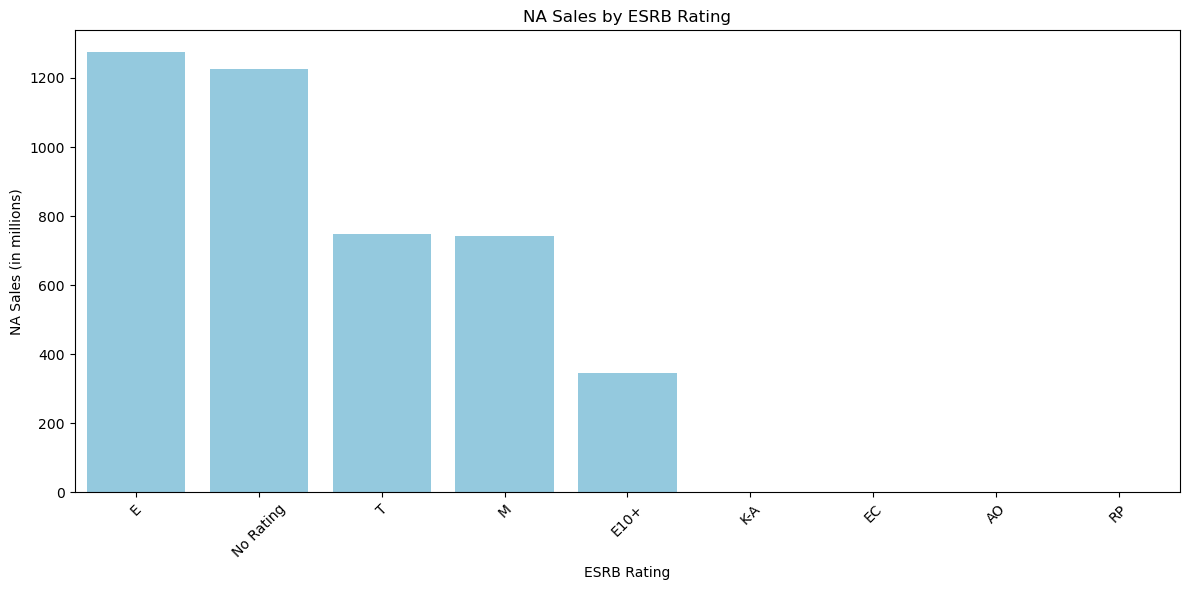

In [272]:
# Determine the top five platforms in NA. 
# Determine the the top five genres in NA. 
# Determine the impact ESRB rating on NA sales.

# Top 5 platforms in NA
na_platform_sales = games.groupby('platform')['na_sales'].sum().reset_index()
na_platform_sales = na_platform_sales.sort_values(by='na_sales', ascending=False)
top_5_na_platforms = na_platform_sales.head(5)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_5_na_platforms, x='platform', y='na_sales', color='skyblue')
plt.xlabel('Platform')
plt.ylabel('NA Sales (in millions)')
plt.title('Top 5 Platforms by NA Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 5 genres in NA
na_genre_sales = games.groupby('genre')['na_sales'].sum().reset_index()
na_genre_sales = na_genre_sales.sort_values(by='na_sales', ascending=False)
top_5_na_genres = na_genre_sales.head(5)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_5_na_genres, x='genre', y='na_sales', color='skyblue') 
plt.xlabel('Genre')
plt.ylabel('NA Sales (in millions)')
plt.title('Top 5 Genres by NA Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Impact of ESRB rating on NA sales
esrb_sales = games.groupby('rating')['na_sales'].sum().reset_index()
esrb_sales = esrb_sales.sort_values(by='na_sales', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=esrb_sales, x='rating', y='na_sales', color='skyblue')
plt.xlabel('ESRB Rating')
plt.ylabel('NA Sales (in millions)')
plt.title('NA Sales by ESRB Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### **5.2 EU User Profile**

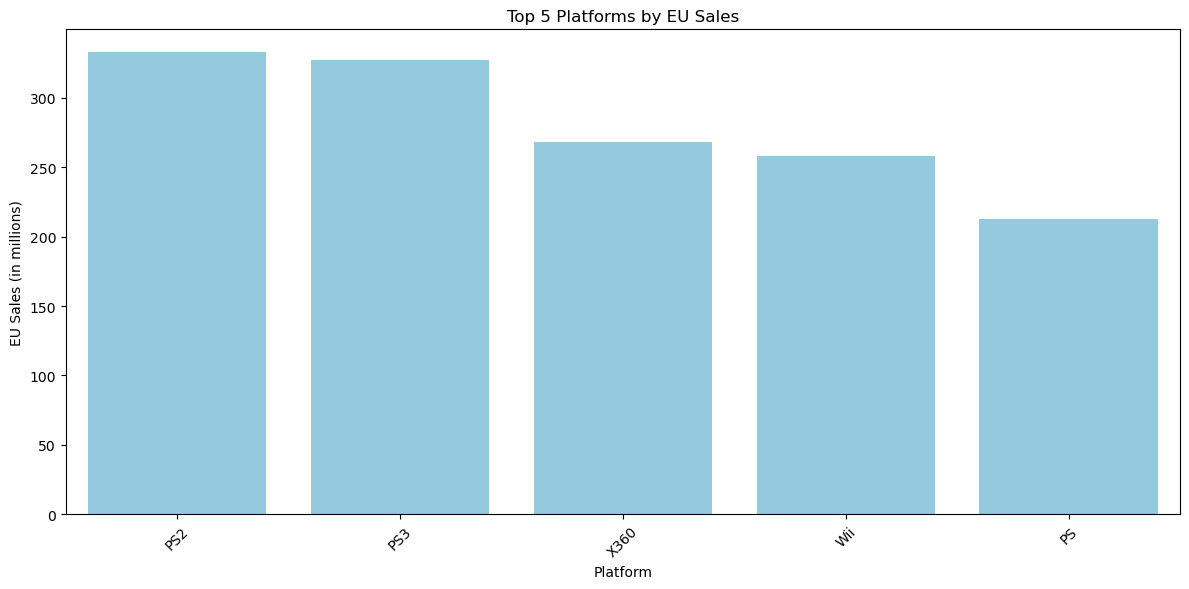

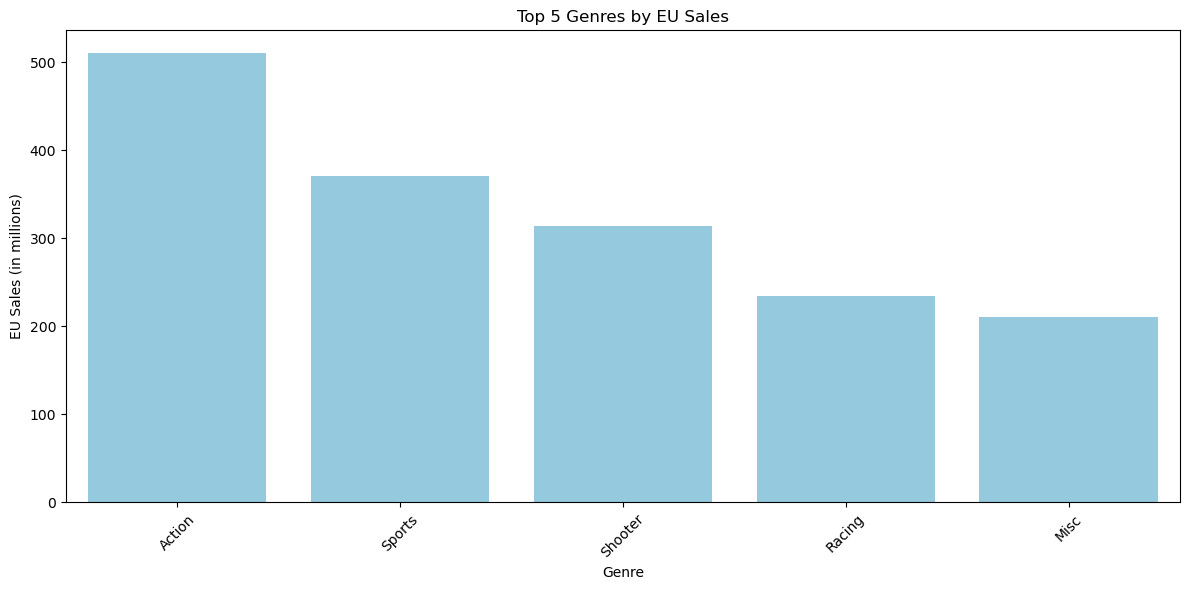

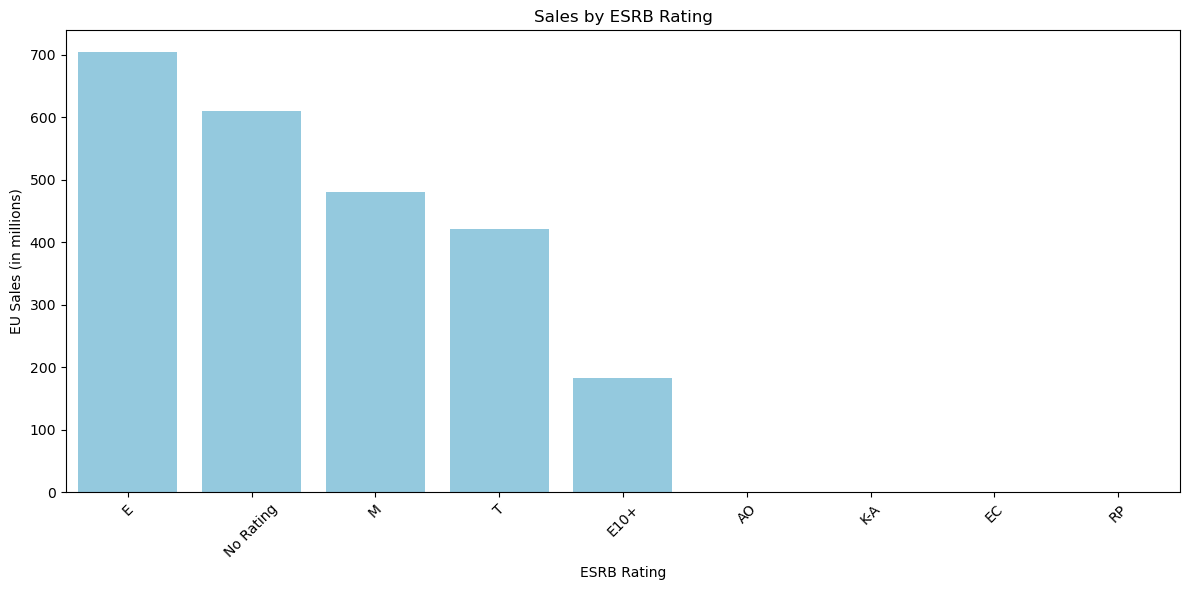

In [273]:
# Determine the top five platforms in EU. 
# Determine the the top five genres in EU. 
# Determine the impact ESRB rating on EU sales.

# Top 5 platforms in EU
eu_platform_sales = games.groupby('platform')['eu_sales'].sum().reset_index()
eu_platform_sales = eu_platform_sales.sort_values(by='eu_sales', ascending=False)
top_5_eu_platforms = eu_platform_sales.head(5)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_5_eu_platforms, x='platform', y='eu_sales', color='skyblue')
plt.xlabel('Platform')
plt.ylabel('EU Sales (in millions)')
plt.title('Top 5 Platforms by EU Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 5 genres in EU
eu_genre_sales = games.groupby('genre')['eu_sales'].sum().reset_index()
eu_genre_sales = eu_genre_sales.sort_values(by='eu_sales', ascending=False)
top_5_eu_genres = eu_genre_sales.head(5)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_5_eu_genres, x='genre', y='eu_sales', color='skyblue') 
plt.xlabel('Genre')
plt.ylabel('EU Sales (in millions)')
plt.title('Top 5 Genres by EU Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Impact of ESRB rating on EU sales
esrb_sales = games.groupby('rating')['eu_sales'].sum().reset_index()
esrb_sales = esrb_sales.sort_values(by='eu_sales', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=esrb_sales, x='rating', y='eu_sales', color='skyblue')
plt.xlabel('ESRB Rating')
plt.ylabel('EU Sales (in millions)')
plt.title('Sales by ESRB Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### **5.3 JP User Profile**

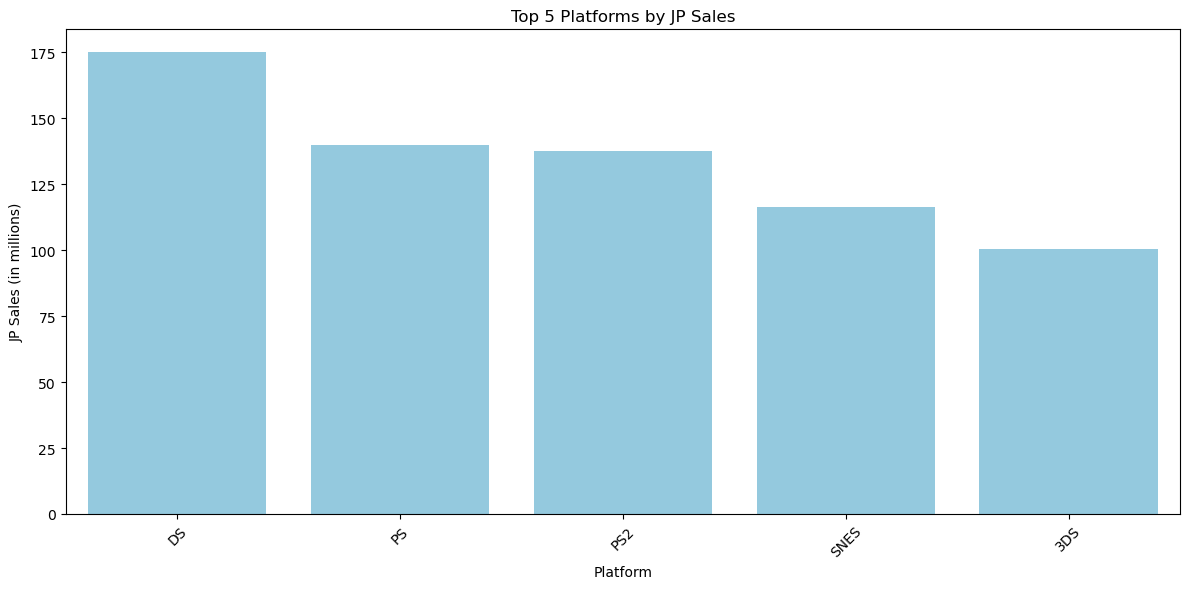

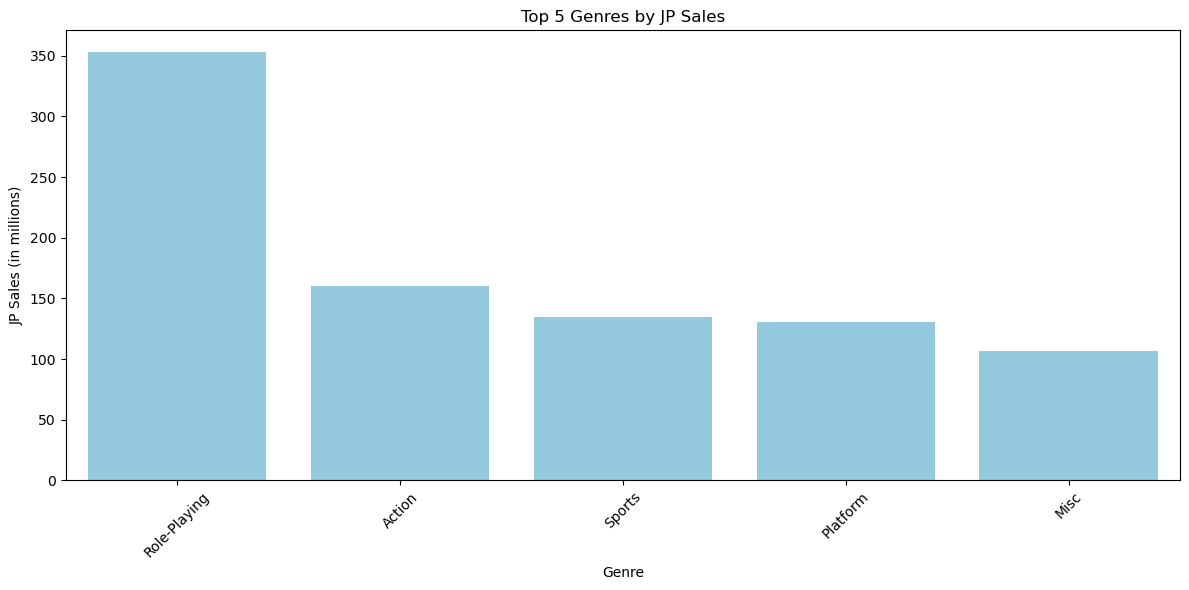

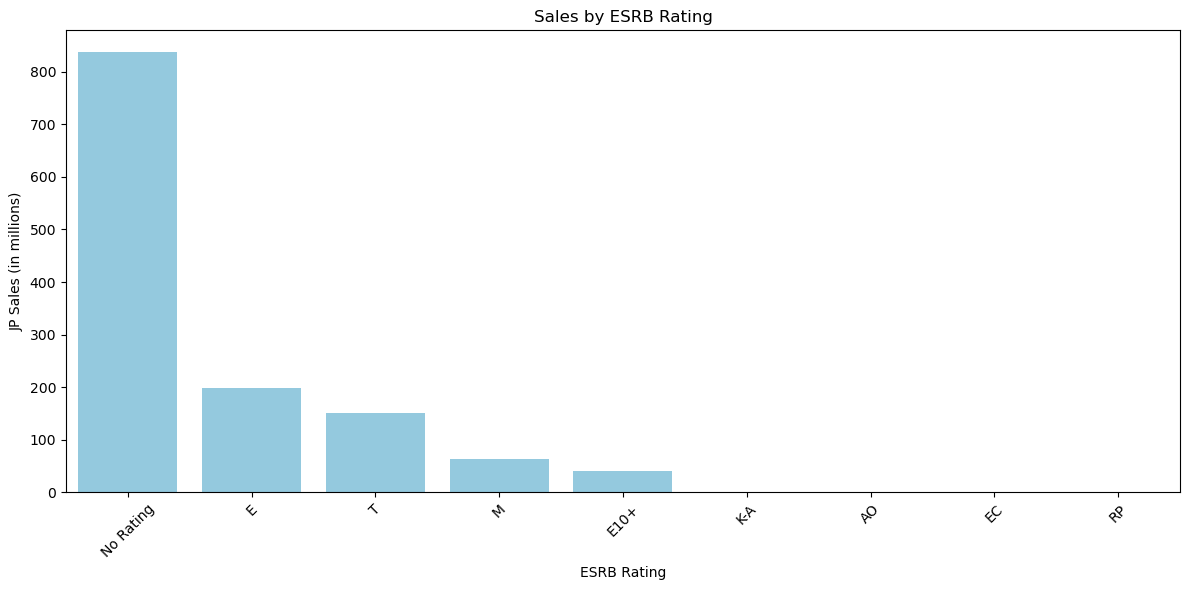

In [274]:
# Determine the top five platforms in JP. 
# Determine the the top five genres in JP. 
# Determine the impact ESRB rating on JP sales.

# Top 5 platforms in JP
jp_platform_sales = games.groupby('platform')['jp_sales'].sum().reset_index()
jp_platform_sales = jp_platform_sales.sort_values(by='jp_sales', ascending=False)
top_5_jp_platforms = jp_platform_sales.head(5)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_5_jp_platforms, x='platform', y='jp_sales', color='skyblue')
plt.xlabel('Platform')
plt.ylabel('JP Sales (in millions)')
plt.title('Top 5 Platforms by JP Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 5 genres in JP
jp_genre_sales = games.groupby('genre')['jp_sales'].sum().reset_index()
jp_genre_sales = jp_genre_sales.sort_values(by='jp_sales', ascending=False)
top_5_jp_genres = jp_genre_sales.head(5)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_5_jp_genres, x='genre', y='jp_sales', color='skyblue') 
plt.xlabel('Genre')
plt.ylabel('JP Sales (in millions)')
plt.title('Top 5 Genres by JP Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Impact of ESRB rating on JP sales
esrb_sales = games.groupby('rating')['jp_sales'].sum().reset_index()
esrb_sales = esrb_sales.sort_values(by='jp_sales', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=esrb_sales, x='rating', y='jp_sales', color='skyblue')
plt.xlabel('ESRB Rating')
plt.ylabel('JP Sales (in millions)')
plt.title('Sales by ESRB Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### **5.4 Conclusions**
- The best selling platform in:
    - NA: XBox360, followed closely by the PS2
    - EU: PS2, followed very closely by the PS3
    - JP: DS, followed by the PS
- The NA and EU regions appear to trend similarly, though the EU tends to have preferences towards Sony products.
    - NA and EU share 4 of their top 5 platforms as the highest selling options and are very console-centric.
- In contrast, the JP region places the DS as its top-selling console by a significant margin, and the 3DS (another handheld console) occupies the 5th place slot.
    - This is indicative of a cultural preference for mobile-gaming in JP vs. the western regions of NA and EU.
- The best selling genres in:
    - NA/EU: Action, Sports, and Shooters
    - JP: Role-Playing, Action, and Sports
- There is a strong preference in the western regions for action games, and the following two genres of sports and shooters also carry mass appeal to a broad audience.
    - By contrast, the JP region has a strong preference for role-playing games, which appears to be another cultural preference, as the western regions do not list role-playing games even in rest of their top 5 genres.
- The NA and EU markets have the highest total sales on games that carry an ESRB rating of 'E':
    - This logically follows, as this rating is suitable for a much larger demographic than more mature ratings that may put casual gamers or other groups in the population off.
- By contrast, the JP region does not appear to be impacted whatsoever by the presence of an ESRB rating, as the highest total sales by a substantial marging carry no rating whatsoever.
    - As ESRB is a rating system that governs the content ratings for video games in North America, this does not necessarily carry over into Japan, where alternative rating systems may be used or North American designations may not otherwise apply.

#### **6. Hypothesis Testing**

##### __6.1 Xbox One vs. PC User Ratings__

The following code will perform hypothesis testing to determine whether the average user rating of the Xbox One and PC platforms differ.

**KEY INFORMATION**:
- __H<sub>0</sub>__ = The average user ratings of the Xbox One and PC platforms do not differ significantly.
- __H<sub>1</sub>__ = The average user ratings of the Xbox One and PC platforms differ significantly.
- __&alpha;__ = 0.05: Selected as 0.05 is standard for most business analysis hypothesis testing.
- __`st.ttest_ind()`__: Selected this statistical test as the hypothesis is concerned with asssessing the equality of two population means.

In [275]:
# Test the hypotheses
xbox1_user_scores =games[games['platform'] == 'XOne']['user_score']
pc_user_scores = games[games['platform'] == 'PC']['user_score']

alpha = 0.05 #Standard acceptable alpha for business research

test_results = st.ttest_ind(xbox1_user_scores, pc_user_scores, equal_var=False)

print('p-value: ', test_results.pvalue)

print()

if test_results.pvalue < alpha:
    print ('We reject the null hypothesis')
else:
    print('We can\'t reject the null hypothesis')

p-value:  4.3968409560037004e-05

We reject the null hypothesis


__Conclusions & Commentary__:
- The initial prompt "average user ratings of the XBox One and PC platforms are the same" follows the logic for describing a null hypothesis, which is a statement of confirmation (i.e., The mean of the population in question = A). Therefore, the opposite would be the alternative hypothesis, whereby the average user ratings... are not the same. 
- An alpha value of 0.05 was selected to compare the p-value againts as this is a standard acceptable value used for business research.
- The hypothesis test rejected the null hypothesis on the grounds that the p-value caluclated in the test was less than the alpha value.
- The test supports the alternative hypothesis, in that the average user ratings of the Xbox One and PC platforms differ signficiantly.
    - This is an interesting finding, which suggests that perhaps the more traditional console-gaming experience that Xbox provides would likely garner more advertising support and market hype,as the consoles are more popular across a broader audience and more casual gamers. 
    - As the Xbox line undoubtedly realizes greater exposure than PC platforms, more users are engaging with Xbox, and therefore a much wider pool of user ratings becomes available for that platform.

##### __6.2 Action vs. Sports Games User Ratings__

The following code will perform hypothesis testing to determine whether the average user rating of the Action and Sports genre differ.

**KEY INFORMATION**:
- __H<sub>0</sub>__ = The average user ratings of the Action and Sports genres do not differ significantly.
- __H<sub>1</sub>__ = The average user ratings of the Action and Sports genres differ significantly.
- __&alpha;__ = 0.05: Selected as 0.05 is standard for most business analysis hypothesis testing.
- __`st.ttest_ind()`__: Selected this statistical test as the hypothesis is concerned with asssessing the equality of two population means.

In [276]:
# Test the hypotheses
action_user_scores =games[games['genre'] == 'Action']['user_score']
sports_user_scores = games[games['genre'] == 'Sports']['user_score']

alpha = 0.05 #Standard acceptable alpha for business research

test_results = st.ttest_ind(action_user_scores, sports_user_scores, equal_var=False)

print('p-value: ', test_results.pvalue)

print()

if test_results.pvalue < alpha:
    print ('We reject the null hypothesis')
else:
    print('We can\'t reject the null hypothesis')

p-value:  0.5696868901880056

We can't reject the null hypothesis


__Conclusions & Commentary__:
- The initial prompt "average user ratings of the Action and Sports genres are different" follows the logic for describing a alternative hypothesis, which is a statement that opposes a hypothesis of equivalency (i.e., The mean of the population in question = A). Therefore, the opposite would be the null hypothesis, whereby the average user ratings... are the same. 
- An alpha value of 0.05 was selected to compare the p-value againts as this is a standard acceptable value used for business research.
- The hypothesis test could not reject the null hypothesis on the grounds that the p-value caluclated in the test was greater than the alpha value.
- The test supports the null hypothesis, in that the average user ratings of the Action and Sports genre games are not different.
    - As Action and Sports genre games dominate all regional markets as part of the top 3 highest selling categories, it is not surprising that the spread in regards to their user reviews are not significantly different; otherwise it would be reasonable to expect that one of these genres may be occupying another position in the profitability rankings.
    - These genres appeal to a very broad audience, and therefore are more apt to garner a substantial amount of user feedback that follows similar distributions in spread.

#### **7. Conclusion**
- __Project Objectives:__
    - Develop an advertising strategy for projected winners in the video game sector.
    - Load, cleanse, transform, and visualize dataset containing market data for video game sales by title for analysis.
    - Provide insights to client, Ice, to inform marketing strategy going into 2017 using with regional preferences in mind.
- __Results Summary:__
    - Though the number of games released per year peaked in the late 2000s, the output has stablized across all platforms from 2012 onwards, informing the time interval in which these recommendations have been primarily based off of.
    - The top 5 platforms by total sales of all time were the PS2, the Xbox360, the PS3, the Wii, and the DS, respectively.
        - It is worth noting that even though these platforms were the highest earners of all time, all of these platforms are at or are beyond the end of their lifecycle (at or approaching $0 in total annual sales), and advertising consideration should not prioritize these platforms whatsoever.
        - The analysis shows that platforms are typically introduced approximately every 5 years, and their lifecycle spans approximately 10 years.
    - Factoring in the scope of the analysis (from 2012 through 2016), the top 5 platforms are the PS4, the PS3, the Xbox360, the 3DS, and the Xbox One:
        - Of this list, only the PS4 and the Xbox One are at the beginning of their lifecycle, and we urge Ice to consider prioritizing advertising spend with these platforms in mind going in to 2017.
        - The other members of this top 5 list are on the downswing with declining sales, and are at the end of their lifecycle.
    - The analysis above shows that user and critic scores do not have a tremendous impact on sales, though critic scores have a very weak positive correlation when analyzed on the scores' effects on sales of titles for the PS4:
        - Critic scores should be used strategically to build hype for PS4 and Xbox One titles coming up in the next year to increase the likelihood of consumer pre-orders and appetite for additional DLC.
    - Action and Sports genre titles dominate in all markets, regardless of region, though RPGs are the leading genre in Japan, and Shooters occupy the 3rd slot in the western markets (NA and EU).
    - ESRB ratings impact the western markets much more than they do the Japanese market, with 'E' rated games leading the way in sales in the west. 
        - Funding for advertisement pertaining to games rated for all audiences would optimize the money-making potential of Ice's 2017 strategy, though more research should be done on the impact of content maturity in the Japanese market if the ESRB system is not used there.
    - The console-based platforms lead the way in the west (Xbox 360, PS2, PS3), and therefore it is reasonable to suspect that the PS4 will also do well in these markets, so that is where advertisment prioritization needs to be in the 2017 plan.
        - Japanese markets show that there is a preference for mobile-gaming, with the DS and 3DS both making their way into the top platform there. The next generation in mobile-gaming should be well understood going into 2017 to advertise in the Japanese markets with sensitivity to those preferences.
- __Next Steps:__
1. Prioritize Active and Emerging Platforms
    - Focus advertising and launch efforts on the PS4 and Xbox One, which are early in their life cycles and continue to show strong momentum in global markets.
    - Deprioritize legacy platforms (e.g., PS3, Xbox 360, Wii, DS), which, despite historical success, are no longer commercially viable for future campaigns.
2. Tailor Strategy to Regional Platform Preferences
    - In North America and Europe, continue emphasizing console-based marketing (PS4 and Xbox One), given the long-standing success of console titles in these regions.
    - In Japan, where handheld platforms like the DS and 3DS have historically led, ensure future mobile gaming trends are well researched and accounted for in upcoming regional campaigns.
3. Leverage Genre Trends for Targeted Content
    - Continue investing in Action and Sports titles, which dominate across global markets.
    - Strategically allocate resources for RPGs in Japan, and consider shooter campaigns as a third-tier genre in Western markets.
4. Use Critic Scores as a Minor Contributing Factor in the Overall Advertising Strategy
    - Leverage early reviews for building pre-launch hype and pre-order consumer excitement.
5. Prioritize Advertising for 'E' Rated Games
    - In Western markets, 'E'-rated games outperform other ratings, suggesting strong ROI on marketing campaigns targeting family and all-ages demographics.
    - Future ad campaigns should should capitalize on this market insight, and place emphasis on the family-friendly, accessible and inclusive nature of these games.
    - Conduct deeper market research on the content rating systems particular to the Japanese market to better understand how best to position advertising where ESRB does not necessarily translate 1:1 to the consumer base.
    